Data set: Baseball Data
-----------------------
A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. Sabermetrics( Society for American Baseball Research) is the empirical analysis of baseball, especially baseball statistics that measure in-game activity. Sabermetricians collect and summarize the relevant data from this in-game activity to answer specific questions. 
Tables Used: 
------------
1. Teams.csv
2. Batting.csv
3. Salaries.csv

Baseball Data analysis(Questions to answers)
--------------------------------------------
1. Is there is reationship between salary of team of player and their run scored?
2. What are the performance metrics of the players?
3. Performance metrics can be created using existing ones?
4. Is there relationship between the perofrmance meritcs of the palyers and their run scored? This information could be ued to predict the run score of the playes base on the performance in the game. 

In [ ]:
# Impot libraries
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Reading and uderstanding the data
teams = pd.read_csv("Teams.csv")
# teams
teams = teams[teams['yearID'] >= 1985]
# Select 15 attributes
teams = teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

teams = teams.set_index(['yearID', 'teamID'])
teams


Rank    R   RA    G    W     H   BB   HBP    AB    SF   HR  \
yearID teamID                                                               
1985   ATL        5  632  781  162   66  1359  553   NaN  5526   NaN  126   
       BAL        4  818  764  161   83  1451  604   NaN  5517   NaN  214   
       BOS        5  800  720  163   81  1615  562   NaN  5720   NaN  162   
       CAL        2  732  703  162   90  1364  648   NaN  5442   NaN  153   
       CHA        3  736  720  163   85  1386  471   NaN  5470   NaN  146   
       CHN        4  686  729  162   77  1397  562   NaN  5492   NaN  150   
       CIN        2  677  666  162   89  1385  576   NaN  5431   NaN  114   
       CLE        7  729  861  162   60  1465  492   NaN  5527   NaN  116   
       DET        3  729  688  161   84  1413  526   NaN  5575   NaN  202   
       HOU        3  706  691  162   83  1457  477   NaN  5582   NaN  121   
       KCA        1  687  639  162   91  1384  473   NaN  5500   NaN  154   
       LAN        1  682  579  162   95  1434  539   NaN  5502   NaN  129   
       MIN        4  705  782  162   77  1453  502   NaN  5509   NaN  141   
       ML4        6  690  802  161   71  1467  462   NaN  5568   NaN  101   
       MON        3  633  636  161   84  1342  492   NaN  5429   NaN  118   
       NYA        2  839  660  161   97  1458  620   NaN  5458   NaN  176   
       NYN        2  695  568  162   98  1425  546   NaN  5549   NaN  134   
       OAK        4  757  787  162   77  1475  508   NaN  5581   NaN  155   
       PHI        5  667  673  162   75  1343  527   NaN  5477   NaN  141   
       PIT        6  568  708  161   57  1340  514   NaN  5436   NaN   80   
       SDN        3  650  622  162   83  1405  513   NaN  5507   NaN  109   
       SEA        6  719  818  162   74  1410  564   NaN  5521   NaN  171   
       SFN        6  556  674  162   62  1263  488   NaN  5420   NaN  115   
       SLN        1  747  572  162  101  1446  586   NaN  5467   NaN   87   
       TEX        7  617  785  161   62  1359  530   NaN  5361   NaN  129   
       TOR        1  759  588  161   99  1482  503   NaN  5508   NaN  158   
1986   ATL        6  615  719  161   72  1348  538   NaN  5384   NaN  138   
       BAL        7  708  760  162   73  1425  563   NaN  5524   NaN  169   
       BOS        1  794  696  161   95  1488  595   NaN  5498   NaN  144   
       CAL        1  786  684  162   92  1387  671   NaN  5433   NaN  167   
...             ...  ...  ...  ...  ...   ...  ...   ...   ...   ...  ...   
2016   ARI        4  752  890  162   69  1479  463  50.0  5665  38.0  190   
       ATL        5  649  779  161   68  1404  502  59.0  5514  52.0  122   
       BAL        2  744  715  162   89  1413  468  44.0  5524  36.0  253   
       BOS        1  878  694  162   93  1598  558  43.0  5670  40.0  208   
       CHA        4  686  715  162   78  1428  455  53.0  5550  44.0  168   
       CHN        1  808  556  162  103  1409  656  96.0  5503  37.0  199   
       CIN        5  716  854  162   68  1403  452  52.0  5487  44.0  164   
       CLE        1  777  676  161   94  1435  531  49.0  5484  60.0  185   
       COL        3  845  860  162   75  1544  494  40.0  5614  34.0  204   
       DET        2  750  721  161   86  1476  493  53.0  5526  38.0  211   
       HOU        3  724  701  162   84  1367  554  47.0  5545  31.0  198   
       KCA        3  675  712  162   81  1450  382  45.0  5552  34.0  147   
       LAA        4  717  727  162   74  1410  471  51.0  5431  49.0  156   
       LAN        1  725  638  162   91  1376  525  58.0  5518  32.0  189   
       MIA        3  655  682  161   79  1460  447  54.0  5547  38.0  128   
       MIL        4  671  733  162   73  1299  599  37.0  5330  39.0  194   
       MIN        5  722  889  162   59  1409  513  44.0  5618  43.0  200   
       NYA        4  680  702  162   84  1378  475  42.0  5458  49.0  183   
       NYN        2  671  617  162   87  1342  517  62.0  5459  41.0  218   
       OAK 

In [186]:
# Read the salary of baseball players
salaries = pd.read_csv("Salaries.csv")
# salaries = salaries.set_index(['yearID', 'teamID'])
# salaries.sort_values('salary', axis=0, ascending=True)
salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [187]:
salaries_by_yearID_teamID = salaries.groupby(['yearID', 'teamID'])['salary'].sum()
salaries_by_yearID_teamID
# salaries_by_yearID_teamID[2001, 'OAK']

yearID  teamID
1985    ATL        14807000
        BAL        11560712
        BOS        10897560
        CAL        14427894
        CHA         9846178
        CHN        12702917
        CIN         8359917
        CLE         6551666
        DET        10348143
        HOU         9993051
        KCA         9321179
        LAN        10967917
        MIN         5764821
        ML4        11284107
        MON         9470166
        NYA        14238204
        NYN        10834762
        OAK         9058606
        PHI        10124966
        PIT         9227500
        SDN        11036583
        SEA         4613000
        SFN         8221714
        SLN        11817083
        TEX         7676500
        TOR         8812550
1986    ATL        17102786
        BAL        13001258
        BOS        14402239
        CAL        14427258
                    ...    
2016    ARI        87439063
        ATL        68498291
        BAL       161863456
        BOS       188545761
     

In [190]:
# teams = teams.join(salaries_by_yearID_teamID ,lsuffix='_teams', rsuffix='_salaries_by_yearID_teamID')
teams = teams.join(salaries_by_yearID_teamID, lsuffix='_teams' )
teams
# teams['salary'][2005, "OAK"]
# plt.scatter(teams['salary'][2001], teams['W'][2001])
# plt.show()

Rank    R   RA    G    W     H   BB   HBP    AB    SF   HR  \
yearID teamID                                                               
1985   ATL        5  632  781  162   66  1359  553   NaN  5526   NaN  126   
       BAL        4  818  764  161   83  1451  604   NaN  5517   NaN  214   
       BOS        5  800  720  163   81  1615  562   NaN  5720   NaN  162   
       CAL        2  732  703  162   90  1364  648   NaN  5442   NaN  153   
       CHA        3  736  720  163   85  1386  471   NaN  5470   NaN  146   
       CHN        4  686  729  162   77  1397  562   NaN  5492   NaN  150   
       CIN        2  677  666  162   89  1385  576   NaN  5431   NaN  114   
       CLE        7  729  861  162   60  1465  492   NaN  5527   NaN  116   
       DET        3  729  688  161   84  1413  526   NaN  5575   NaN  202   
       HOU        3  706  691  162   83  1457  477   NaN  5582   NaN  121   
       KCA        1  687  639  162   91  1384  473   NaN  5500   NaN  154   
       LAN        1  682  579  162   95  1434  539   NaN  5502   NaN  129   
       MIN        4  705  782  162   77  1453  502   NaN  5509   NaN  141   
       ML4        6  690  802  161   71  1467  462   NaN  5568   NaN  101   
       MON        3  633  636  161   84  1342  492   NaN  5429   NaN  118   
       NYA        2  839  660  161   97  1458  620   NaN  5458   NaN  176   
       NYN        2  695  568  162   98  1425  546   NaN  5549   NaN  134   
       OAK        4  757  787  162   77  1475  508   NaN  5581   NaN  155   
       PHI        5  667  673  162   75  1343  527   NaN  5477   NaN  141   
       PIT        6  568  708  161   57  1340  514   NaN  5436   NaN   80   
       SDN        3  650  622  162   83  1405  513   NaN  5507   NaN  109   
       SEA        6  719  818  162   74  1410  564   NaN  5521   NaN  171   
       SFN        6  556  674  162   62  1263  488   NaN  5420   NaN  115   
       SLN        1  747  572  162  101  1446  586   NaN  5467   NaN   87   
       TEX        7  617  785  161   62  1359  530   NaN  5361   NaN  129   
       TOR        1  759  588  161   99  1482  503   NaN  5508   NaN  158   
1986   ATL        6  615  719  161   72  1348  538   NaN  5384   NaN  138   
       BAL        7  708  760  162   73  1425  563   NaN  5524   NaN  169   
       BOS        1  794  696  161   95  1488  595   NaN  5498   NaN  144   
       CAL        1  786  684  162   92  1387  671   NaN  5433   NaN  167   
...             ...  ...  ...  ...  ...   ...  ...   ...   ...   ...  ...   
2016   ARI        4  752  890  162   69  1479  463  50.0  5665  38.0  190   
       ATL        5  649  779  161   68  1404  502  59.0  5514  52.0  122   
       BAL        2  744  715  162   89  1413  468  44.0  5524  36.0  253   
       BOS        1  878  694  162   93  1598  558  43.0  5670  40.0  208   
       CHA        4  686  715  162   78  1428  455  53.0  5550  44.0  168   
       CHN        1  808  556  162  103  1409  656  96.0  5503  37.0  199   
       CIN        5  716  854  162   68  1403  452  52.0  5487  44.0  164   
       CLE        1  777  676  161   94  1435  531  49.0  5484  60.0  185   
       COL        3  845  860  162   75  1544  494  40.0  5614  34.0  204   
       DET        2  750  721  161   86  1476  493  53.0  5526  38.0  211   
       HOU        3  724  701  162   84  1367  554  47.0  5545  31.0  198   
       KCA        3  675  712  162   81  1450  382  45.0  5552  34.0  147   
       LAA        4  717  727  162   74  1410  471  51.0  5431  49.0  156   
       LAN        1  725  638  162   91  1376  525  58.0  5518  32.0  189   
       MIA        3  655  682  161   79  1460  447  54.0  5547  38.0  128   
       MIL        4  671  733  162   73  1299  599  37.0  5330  39.0  194   
       MIN        5  722  889  162   59  1409  513  44.0  5618  43.0  200   
       NYA        4  680  702  162   84  1378  475  42.0  5458  49.0  183   
       NYN        2  671  617  162   87  1342  517  62.0  5459  41.0  218   
       OAK 

In [197]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_wins(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'OAK':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)
    ax.set_title('Salaries - Wins: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

In [198]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_Runs(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'OAK':
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['R'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['R'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['R'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Total run score' , fontsize=20)
    ax.set_title('Salaries - Run score: '+ str(year), fontsize=20, fontweight='bold')
    plt.show()

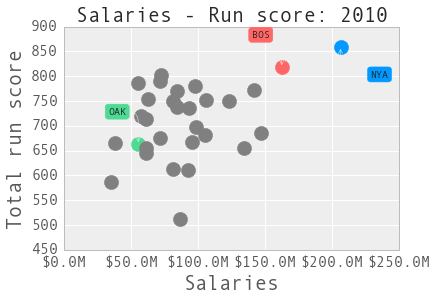

In [199]:
plot_spending_Runs(teams,2010)

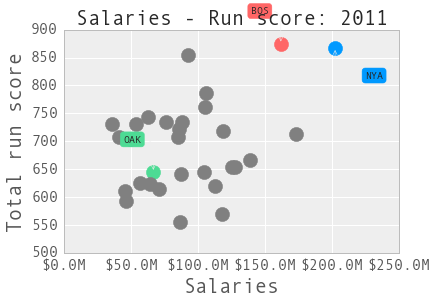

In [200]:
plot_spending_Runs(teams,2011)

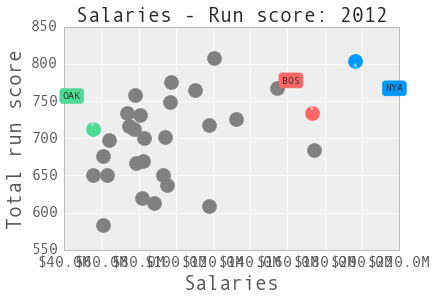

In [201]:
plot_spending_Runs(teams,2012)

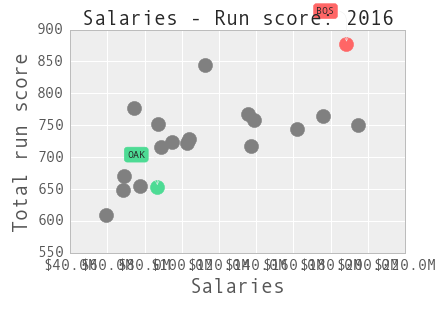

In [202]:
plot_spending_Runs(teams,2016)

Read Batting table
------------------
Three new perofrmance metrics is created using exisiting on
1. Batting Average: measures the performance of batters in baseball<br /> 
   The Batting average is calculated using the formaula.<br />
   Batting Average = Number of hits/At bats

2. Ob base percentage: is a measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference.<br />
  On-base percentage is calculated using this formula:<br />

  OBP = H+BB+HBP/AB+BB+HBP+SF <br />
  where<br />
  H = Hits<br/>
  BB = Bases on Balls (Walks)<br />
  HBP = Hit By Pitch<br />
  AB = At bats<br />
  SF = Sacrifice Flies<br />
  
3. Slugging Percentage: popular measure of the power of a hitter.<br />
    Slugging percentage is calculated using this formula:<br />
    
    SLP = (1*B)+(2*2B)+(3*3B)+(4*HR)/AB. <br />
    where<br />
    1B, 2B, 3B, and HR are the number of singles, doubles, triples, and home runs,
    
 


In [204]:
# Read the batting data
batting = pd.read_csv("Batting.csv")
batting = batting[batting['yearID'] >= 2000]
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,Batting_avg,On_base_percentage,Slugging_percentage
79250,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,21,38.0,1.0,2.0,2.0,1.0,2.0,0.274418605,0.343096234,33.05581395
79251,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,14,51.0,2.0,1.0,0.0,1.0,2.0,0.21656051,0.283236994,17.15286624
79252,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.4,0.4,2
79253,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,100,116.0,9.0,1.0,0.0,3.0,12.0,0.315972222,0.416176471,114.1736111
79254,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.5,0
79255,adamste01,2000,1,LAN,NL,66,2,0,0,0,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0
79256,agbaybe01,2000,1,NYN,NL,119,350,59,101,19,...,54,68.0,2.0,7.0,0.0,3.0,6.0,0.288571429,0.391304348,41.17142857
79257,aguilri01,2000,1,CHN,NL,54,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,#DIV/0!
79258,alcanis01,2000,1,BOS,AL,21,45,9,13,1,...,3,7.0,0.0,0.0,0.0,0.0,0.0,0.288888889,0.333333333,2.355555556
79259,aldresc01,2000,1,PHI,NL,23,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,#DIV/0!


Cleaning the data
-----------------
1. Select atrributes into consideration for analysis.
2. Drop all missing data

In [12]:
# drop Nan
import numpy as np
batting = batting.dropna(how = "any")
batting = batting.replace('#DIV/0!',0)
batting = batting[['playerID','yearID' ,'teamID', 'R', 'Batting_avg','On_base_percentage', 'Slugging_percentage' ]]
batting = batting.replace(0, np.nan)
batting.dropna(how = 'any')
# Change datatypes 
batting[['Batting_avg','On_base_percentage', 'Slugging_percentage']] = batting[['Batting_avg','On_base_percentage', 'Slugging_percentage']].astype(float)


Statistical description of batting data
---------------------------------------

In [137]:
batting.describe()

,yearID,R,Batting_avg,On_base_percentage,Slugging_percentage
count,23565.000000,12936.000000,17292.000000,17360.000000,17292.000000
mean,2008.136007,29.121985,0.198327,0.253243,19.752949
std,4.925593,30.435221,0.134486,0.156374,26.360737
min,2000.000000,1.000000,0.000000,0.000000,0.000000
25%,2004.000000,NaN,NaN,NaN,NaN
50%,2008.000000,NaN,NaN,NaN,NaN
75%,2012.000000,NaN,NaN,NaN,NaN
max,2016.000000,152.000000,1.000000,1.000000,145.150327


Distribution of each attribute by looking at box plot
-----------------------------------------------------

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x12dd1a350>,
 'caps': [<matplotlib.lines.Line2D at 0x12dd28250>,
 'fliers': [<matplotlib.lines.Line2D at 0x12dd33550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12dd28ed0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12dcb1dd0>,
  <matplotlib.lines.Line2D at 0x12dd8b090>]}

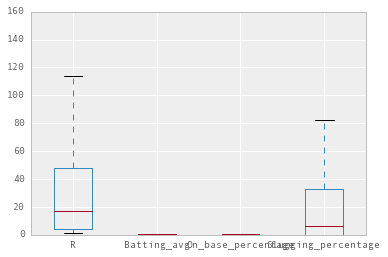

In [139]:
pd.options.display.mpl_style = 'default'
batting_plot = batting[['R', 'Batting_avg','On_base_percentage', 'Slugging_percentage']]
batting_plot.boxplot()

In [97]:
# calculating groupby for each variable
Batting_avg_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['Batting_avg'].sum()
Run_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['R'].sum()
On_base_percentage_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['On_base_percentage'].sum()
Slugging_percentage_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['Slugging_percentage'].sum()

# Slugging_percentage_by_yearID_teamID


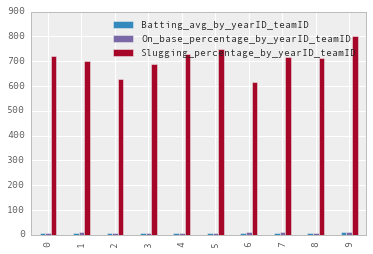

In [207]:
# Joining different data frames into one

df1 = pd.DataFrame(data=Batting_avg_by_yearID_teamID.values, columns=['Batting_avg_by_yearID_teamID'])
df2 = pd.DataFrame(data=On_base_percentage_by_yearID_teamID.values, columns=['On_base_percentage_by_yearID_teamID'])
df3 = pd.DataFrame(data=Slugging_percentage_by_yearID_teamID.values, columns=['Slugging_percentage_by_yearID_teamID'])

df = pd.merge(df1, df2, left_index=True, right_index=True)
# merge all three datafrmanes
df_final = pd.merge(df, df3, left_index=True, right_index=True)
df_final
# plot 10 records of data
df_final=df_final[0:10]
df_final.plot(kind = 'bar')
plt.show()


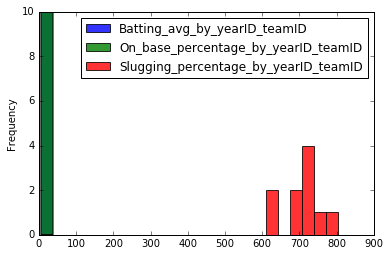

In [119]:

df_final.plot(kind='hist', alpha=0.8, bins =25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1235019d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127e03710>]], dtype=object)

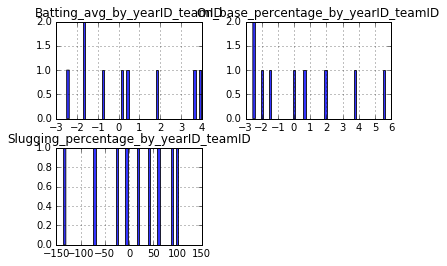

In [125]:
# plots the histograms of the columns on multiple subplots
df_final.diff().hist(color='B', alpha=0.8, bins=50)

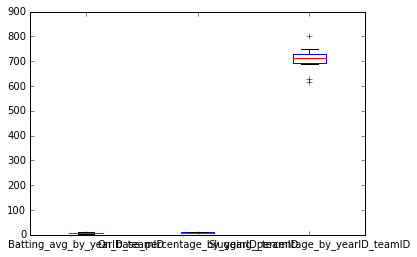

In [126]:
df_final.plot.box()

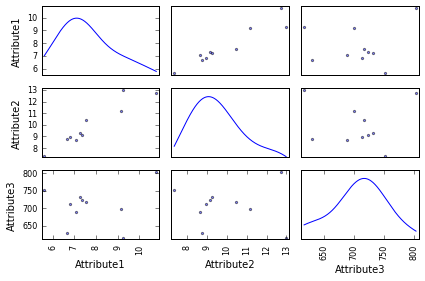

In [128]:
from pandas.tools.plotting import andrews_curves
#Scatter matrix afer outlier removal
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
# data1 =pd.DataFrame(sclaed_filt_df)
# print data
# scale the features
df_final.columns = ["Attribute"+str(i) for i in range(1, len(df_final.columns)+1)]
X = df_final.loc[:, "Feature1":]
pd.tools.plotting.scatter_matrix(df_final.loc[:, "Attribute1":"Attribute3"], diagonal="kde")
plt.tight_layout()
plt.show()

Caculation of correaltion between difeerent variables
----------------------------------------------------

In [133]:
# Correlations
df1 = pd.DataFrame(data=Batting_avg_by_yearID_teamID.values, columns=['Batting_avg'])
df2 = pd.DataFrame(data=On_base_percentage_by_yearID_teamID.values, columns=['On_base_percentage'])
df3 = pd.DataFrame(data=Slugging_percentage_by_yearID_teamID.values, columns=['Slugging_percentage'])
df4 = pd.DataFrame(data=Run_by_yearID_teamID.values, columns=['Run_Score'])
df1_df2 = pd.merge(df1, df2, left_index=True, right_index=True)
# merge all three datafrmanes
df1_df2_df3 = pd.merge(df1_df2, df3, left_index=True, right_index=True)
df1_df2_df3_df4 = pd.merge(df1_df2_df3, df4, left_index=True, right_index=True)
df1_df2_df3_df4

,Batting_avg,On_base_percentage,Slugging_percentage,Run_Score
0,7.339103,9.144034,722.221816,864.0
1,9.161784,11.160178,699.426047,792.0
2,6.658114,8.747840,629.834042,810.0
3,7.084729,8.658648,688.395174,794.0
4,7.261734,9.256321,730.746532,792.0
5,5.617780,7.346886,751.203412,978.0
6,9.250098,12.989246,616.137157,764.0
7,7.546349,10.439419,716.854187,825.0
8,6.798189,8.972093,712.618307,950.0
9,10.778521,12.728816,802.850996,968.0


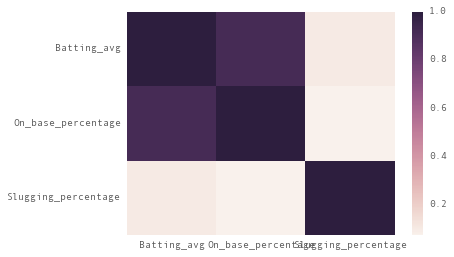

In [158]:
import seaborn as sns
df1_df2_df3_df4 = df1_df2_df3_df4[['Batting_avg', 'On_base_percentage', 'Slugging_percentage'] ]
corr = df1_df2_df3_df4.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

   [1]: http://url

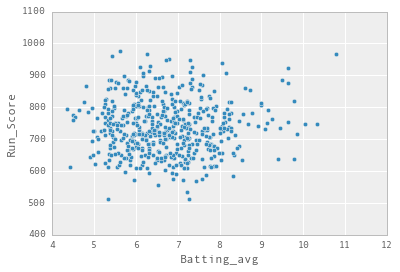

In [154]:
# Scatter Plot
df1_df2_df3_df4.plot.scatter(y='Run_Score',x='Batting_avg')

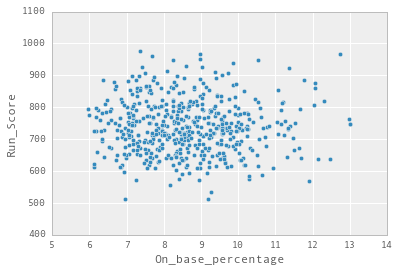

In [155]:
df1_df2_df3_df4.plot.scatter(y='Run_Score',x='On_base_percentage')

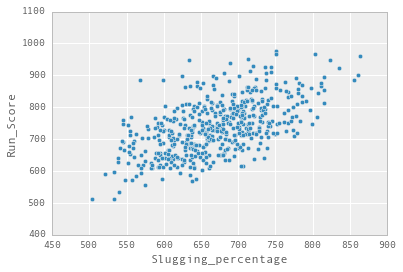

In [156]:
df1_df2_df3_df4.plot.scatter(y='Run_Score',x='Slugging_percentage')

Conclusion
----------
1. Higher the number of the salary, higher the run scored ny team.
2. There is a positive correation between run score and Batting average by the player.
3. There is a positive correation between run score and n base percentage by the player.
4. There is a positive  and strong correation between run score and Slugging percentage by the player.

Refrecnes links
---------------
1. <https://en.wikipedia.org/wiki/Sabermetrics>
2. <http://adilmoujahid.com/posts/2014/07/baseball-analytics/>
3. <http://www.seanlahman.com/baseball-archive/statistics/>
4. <https://en.wikipedia.org/wiki/Batting_average>
5. <https://en.wikipedia.org/wiki/On-base_percentage>
6. <https://en.wikipedia.org/wiki/Slugging_percentage>
7. <http://pandas.pydata.org/pandas-docs/stable/visualization.html>